In [77]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as T
import torchvision.datasets
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
# from skimage import io
import os
from sklearn.preprocessing import Normalizer

plt.rcParams['figure.figsize'] = (8, 8)

In [78]:
transform = T.Compose([
#     T.RandomCrop(28),
    T.Resize(32),
#     T.ColorJitter(contrast=0.3, brightness=0.3, saturation=0.3, hue=0.1),
#     T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.41193202, 0.41111976, 0.41164723], std=[0.25553378, 0.25464985, 0.25376996])])

data_set = torchvision.datasets.ImageFolder(r'./TT_Person_dataset', transform=transform)
data_set

Dataset ImageFolder
    Number of datapoints: 2583
    Root Location: ./TT_Person_dataset
    Transforms (if any): Compose(
                             Resize(size=32, interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=[0.41193202, 0.41111976, 0.41164723], std=[0.25553378, 0.25464985, 0.25376996])
                         )
    Target Transforms (if any): None

In [93]:
train_size = int(0.5 * len(data_set))
test_size = len(data_set) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(data_set, [train_size, test_size])

In [94]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=True)

In [113]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
            
        self.l1 = nn.Conv2d(3, 64, 3, padding=1)
        self.l2 = nn.Conv2d(64, 128, 3, padding=1)
        self.l3 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.global_pool = nn.MaxPool2d(4, 4)
        self.output = nn.Linear(256, 2)
        self.dropout = nn.Dropout2d(0.5)
        
    def forward(self, x):
        for l in [self.l1, self.l2, self.l3]:
            x = l(x)
            x = torch.relu(x)
            x = self.pool(x)
        x = self.global_pool(x)
        x = x.view(x.shape[0], x.shape[1])
        x = self.dropout(x)
        x = self.output(x)
        return x

In [114]:
def accuracy(targets, logits):
    return (targets==logits).float().mean()




















  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

epoch 0, train loss 0.56, test loss 0.48, train acc 0.70, test acc 0.71


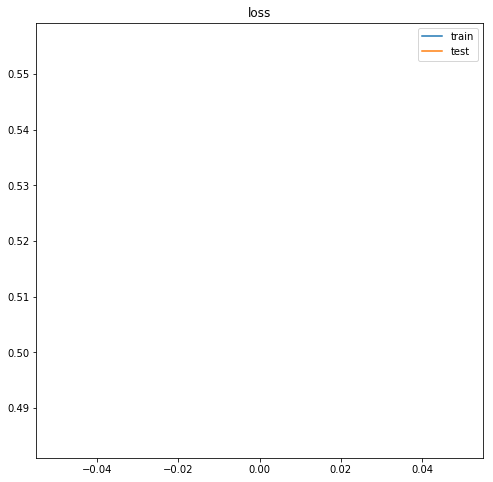

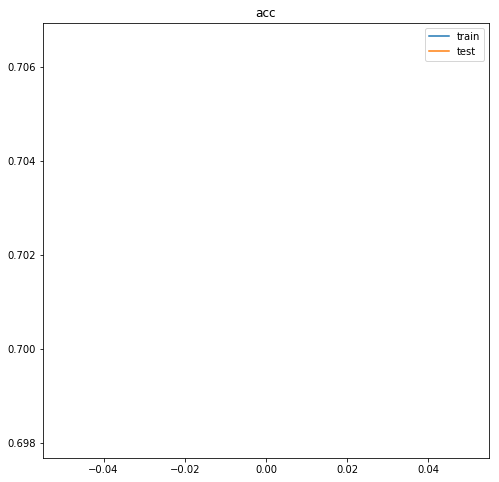




















  3%|██▊                                                                                | 1/30 [00:11<05:39, 11.71s/it]

epoch 1, train loss 0.42, test loss 0.42, train acc 0.80, test acc 0.80


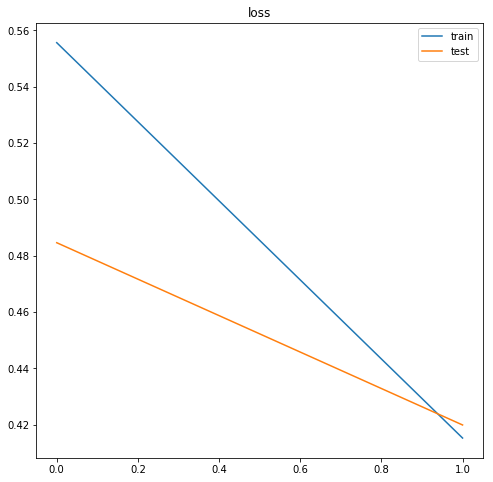

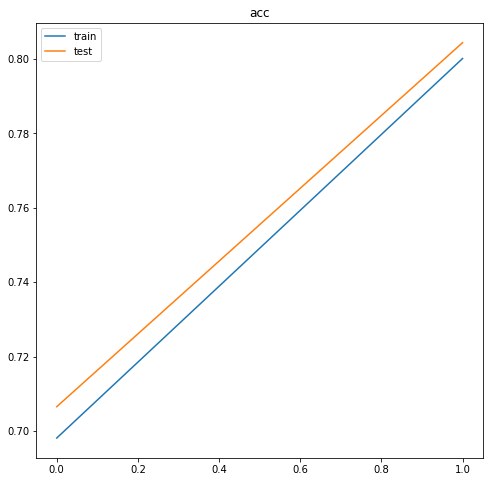




















  7%|█████▌                                                                             | 2/30 [00:23<05:26, 11.67s/it]

epoch 2, train loss 0.41, test loss 0.32, train acc 0.81, test acc 0.87


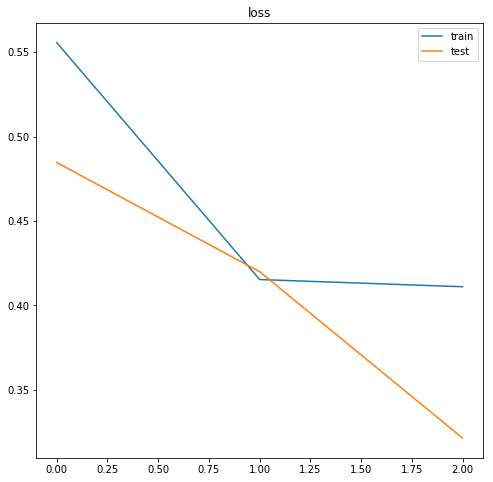

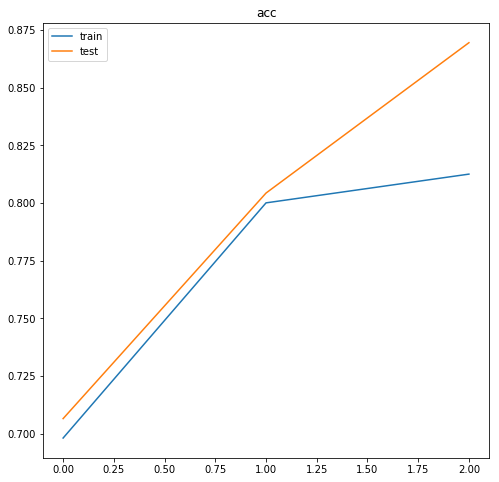




















 10%|████████▎                                                                          | 3/30 [00:35<05:15, 11.70s/it]

epoch 3, train loss 0.34, test loss 0.39, train acc 0.86, test acc 0.79


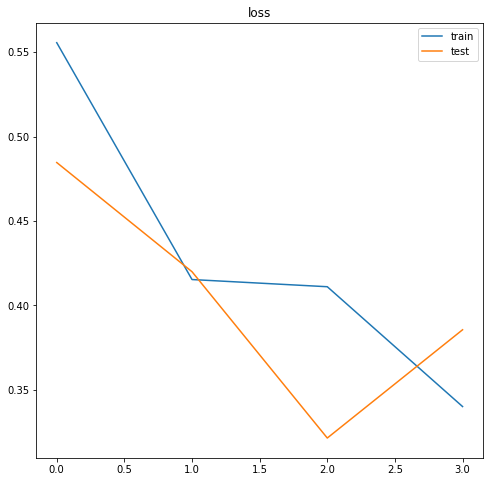

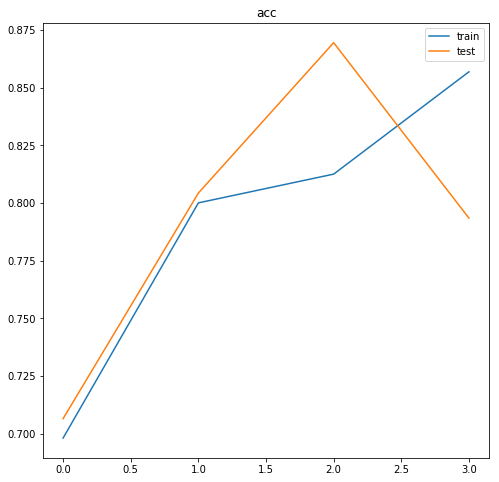




















 13%|███████████                                                                        | 4/30 [00:46<05:04, 11.69s/it]

epoch 4, train loss 0.31, test loss 0.42, train acc 0.86, test acc 0.80


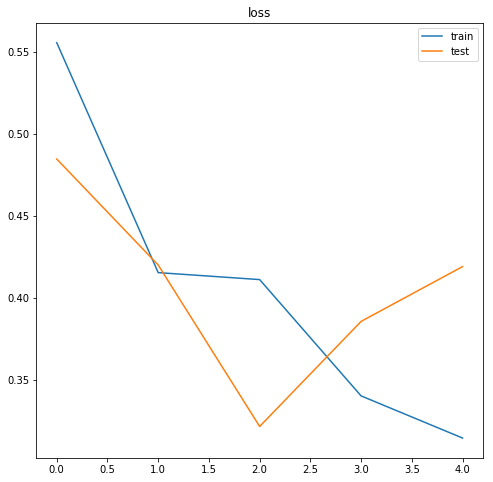

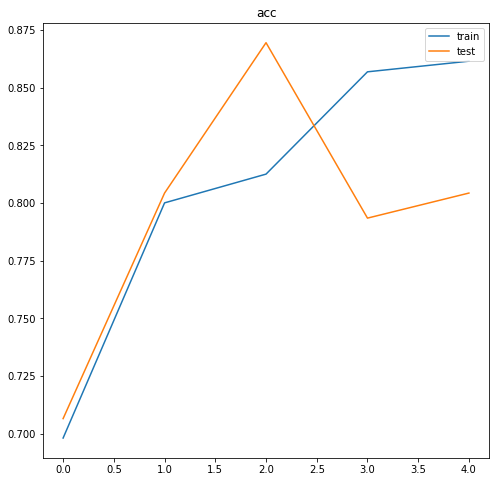




















 17%|█████████████▊                                                                     | 5/30 [00:58<04:51, 11.64s/it]

epoch 5, train loss 0.30, test loss 0.25, train acc 0.87, test acc 0.93


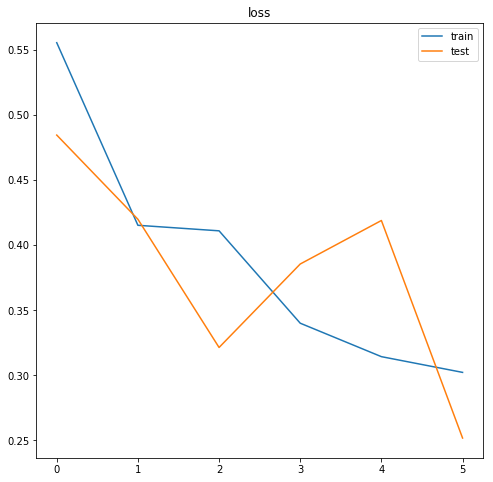

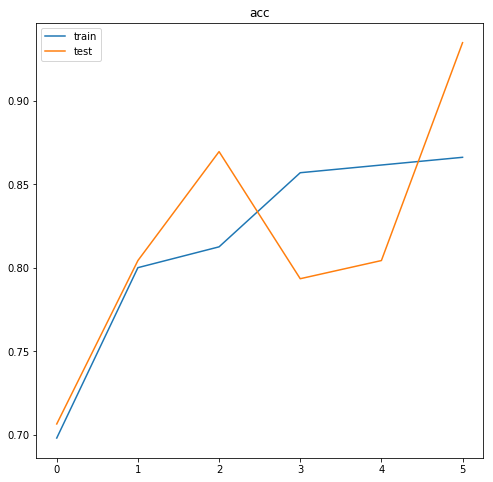




















 20%|████████████████▌                                                                  | 6/30 [01:09<04:38, 11.61s/it]

epoch 6, train loss 0.27, test loss 0.43, train acc 0.88, test acc 0.78


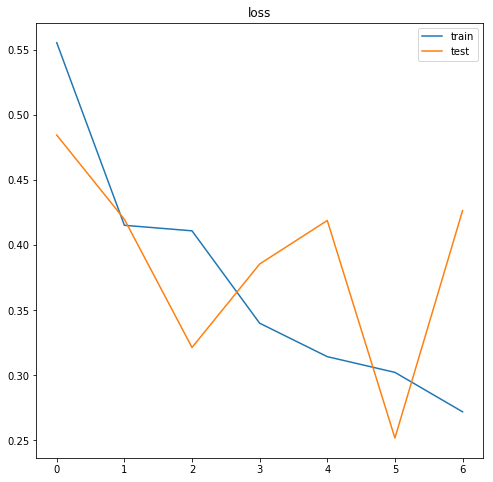

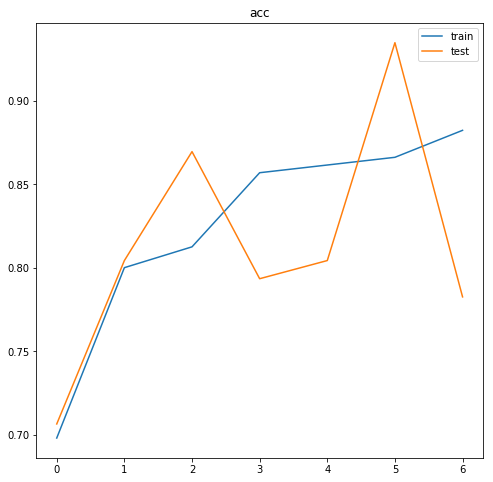




















 23%|███████████████████▎                                                               | 7/30 [01:21<04:25, 11.53s/it]

epoch 7, train loss 0.27, test loss 0.44, train acc 0.89, test acc 0.76


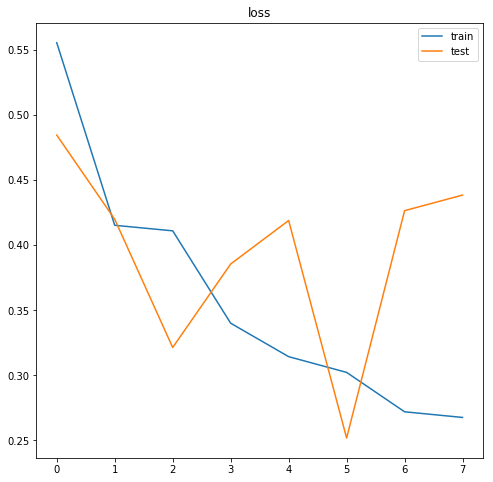

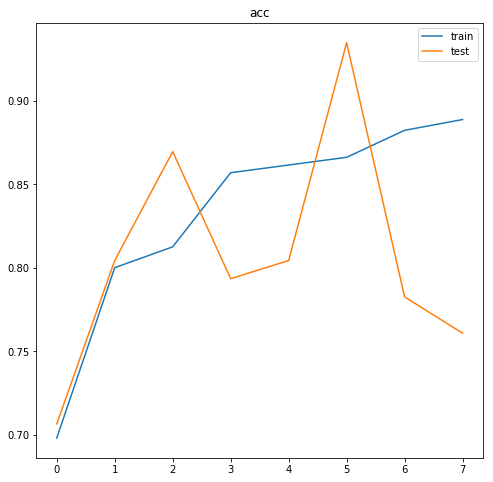




















 27%|██████████████████████▏                                                            | 8/30 [01:32<04:13, 11.53s/it]

epoch 8, train loss 0.25, test loss 0.29, train acc 0.90, test acc 0.84


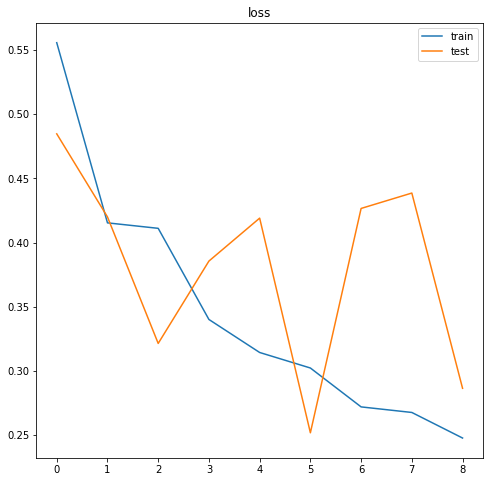

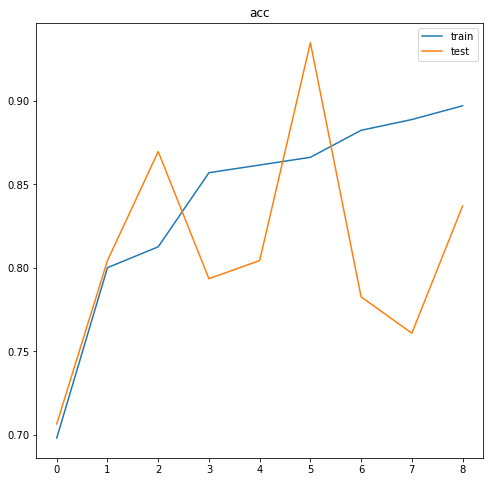




















 30%|████████████████████████▉                                                          | 9/30 [01:43<03:59, 11.43s/it]

epoch 9, train loss 0.23, test loss 0.33, train acc 0.91, test acc 0.87


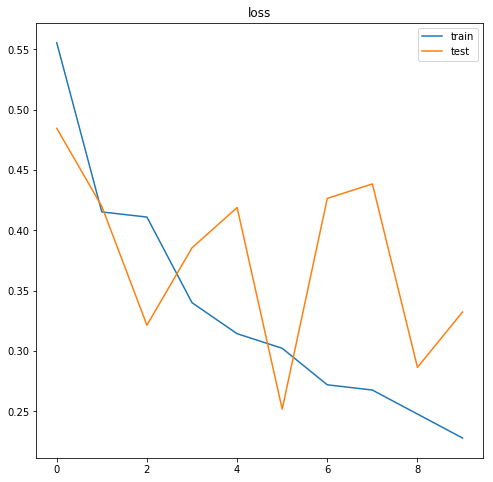

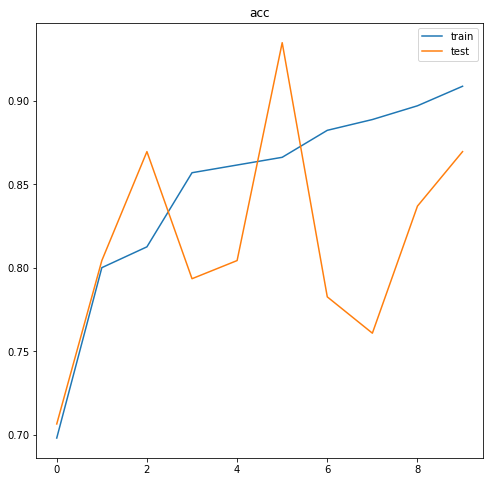




















 33%|███████████████████████████▎                                                      | 10/30 [01:55<03:47, 11.36s/it]

epoch 10, train loss 0.21, test loss 0.29, train acc 0.91, test acc 0.88


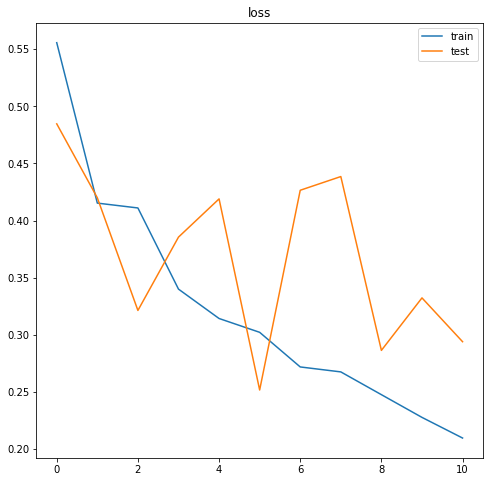

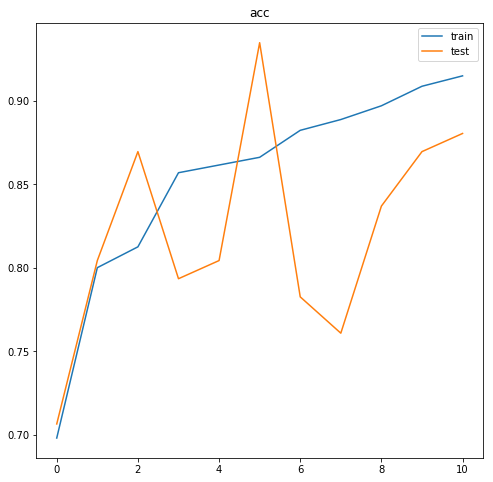




















 37%|██████████████████████████████                                                    | 11/30 [02:06<03:34, 11.28s/it]

epoch 11, train loss 0.18, test loss 0.27, train acc 0.93, test acc 0.89


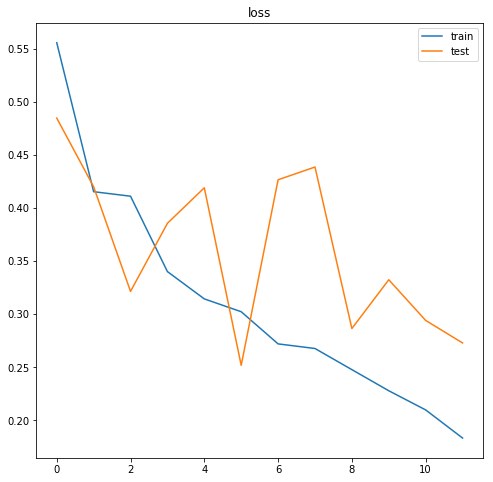

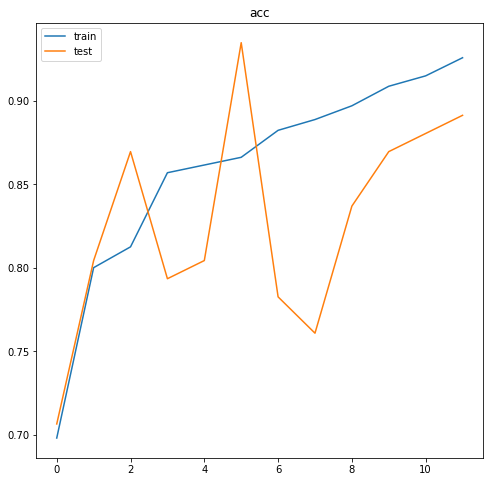




















 40%|████████████████████████████████▊                                                 | 12/30 [02:17<03:22, 11.25s/it]

epoch 12, train loss 0.21, test loss 0.31, train acc 0.91, test acc 0.88


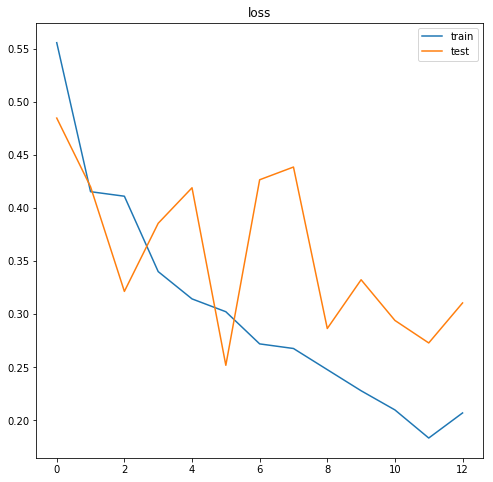

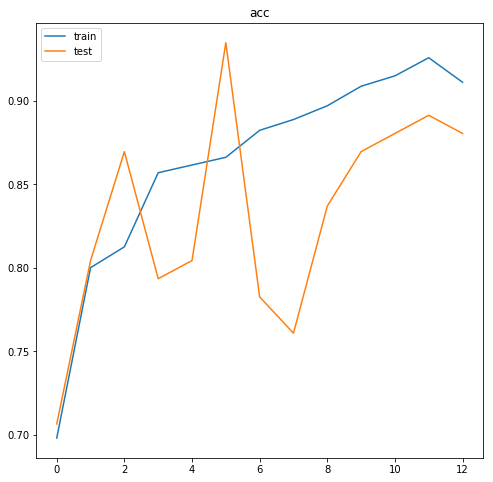




















 43%|███████████████████████████████████▌                                              | 13/30 [02:28<03:10, 11.21s/it]

epoch 13, train loss 0.16, test loss 0.40, train acc 0.94, test acc 0.83


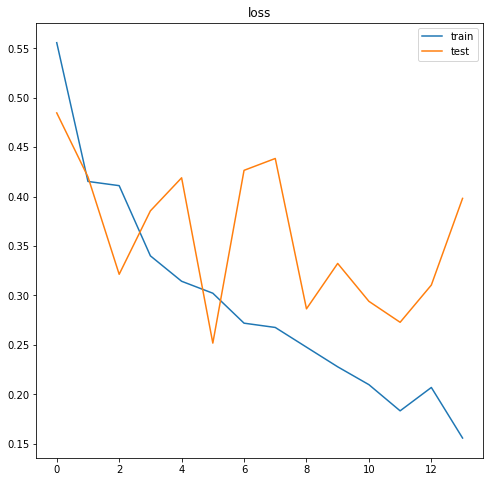

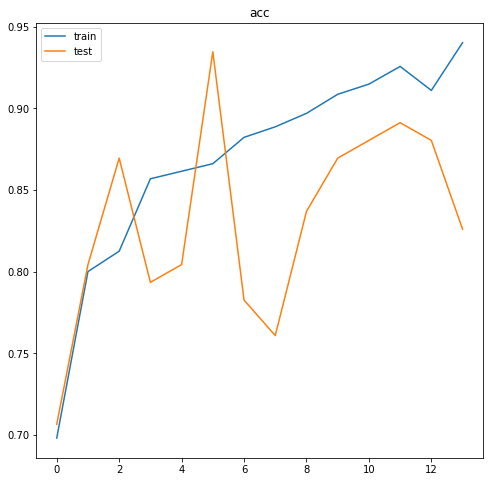




















 47%|██████████████████████████████████████▎                                           | 14/30 [02:39<02:59, 11.21s/it]

epoch 14, train loss 0.13, test loss 0.17, train acc 0.95, test acc 0.91


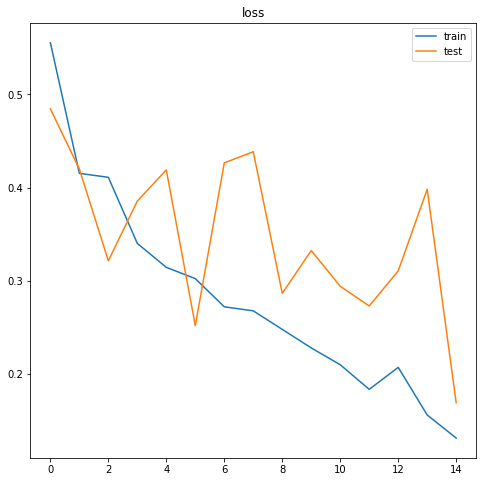

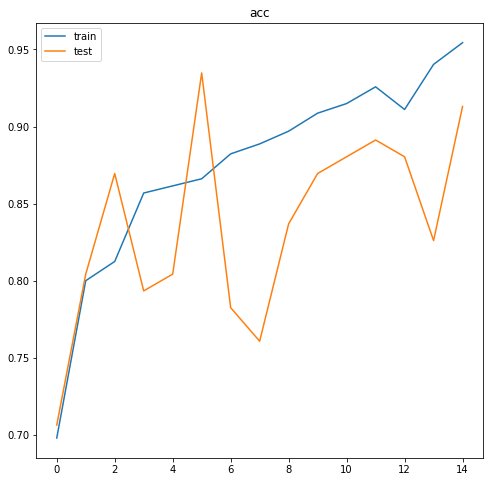




















 50%|█████████████████████████████████████████                                         | 15/30 [02:50<02:48, 11.24s/it]

epoch 15, train loss 0.12, test loss 0.27, train acc 0.95, test acc 0.89


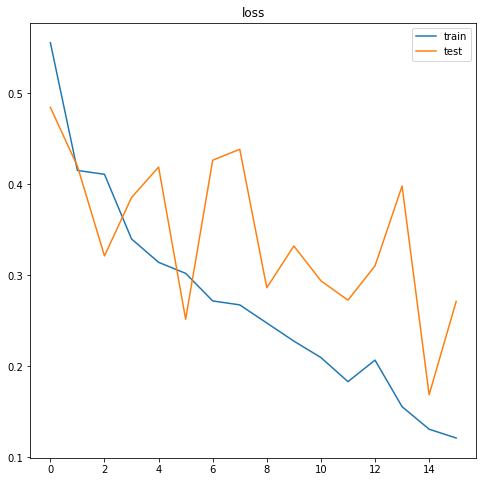

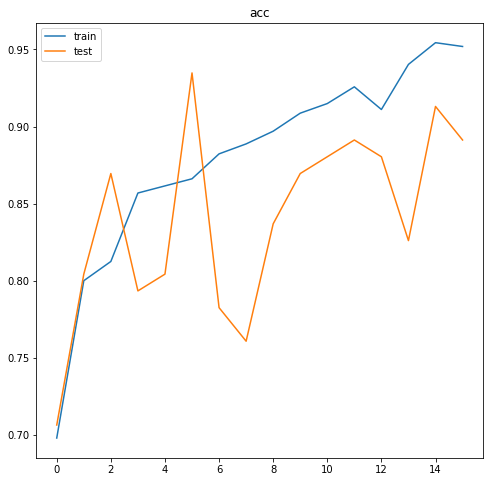




















 53%|███████████████████████████████████████████▋                                      | 16/30 [03:01<02:33, 10.97s/it]

epoch 16, train loss 0.13, test loss 0.14, train acc 0.96, test acc 0.96


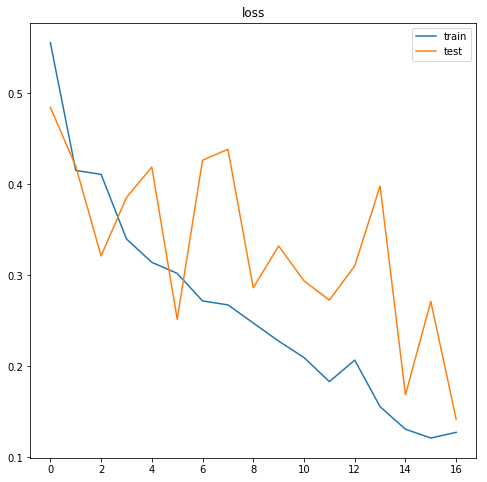

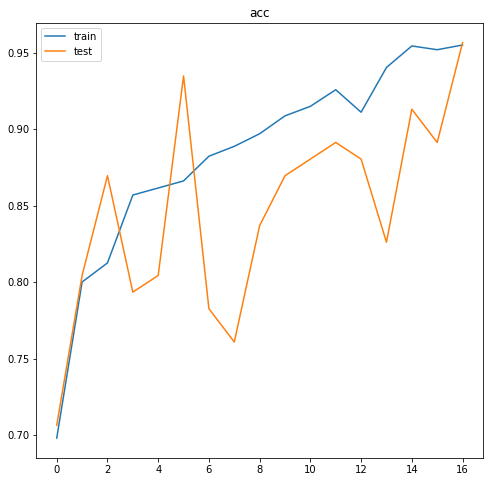




















 57%|██████████████████████████████████████████████▍                                   | 17/30 [03:11<02:18, 10.69s/it]

epoch 17, train loss 0.10, test loss 0.33, train acc 0.97, test acc 0.87


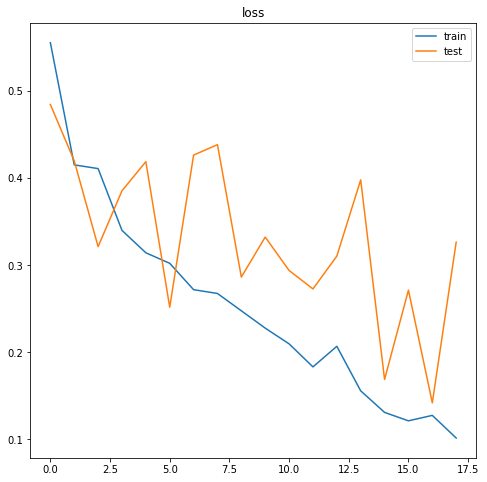

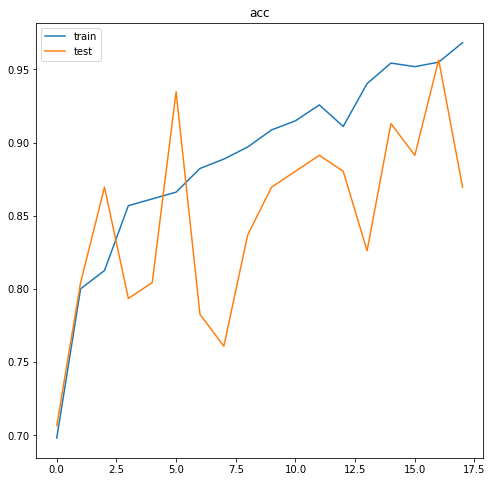




















 60%|█████████████████████████████████████████████████▏                                | 18/30 [03:21<02:06, 10.52s/it]

epoch 18, train loss 0.08, test loss 0.26, train acc 0.97, test acc 0.88


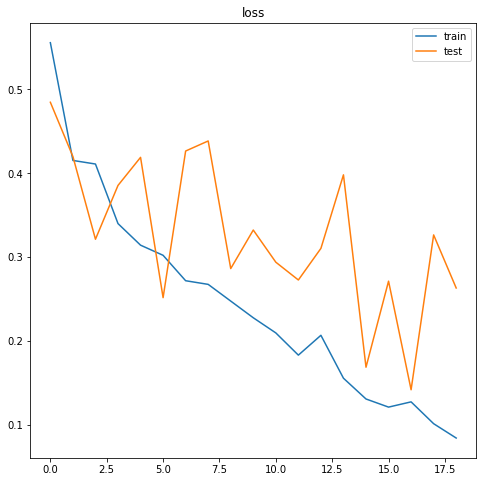

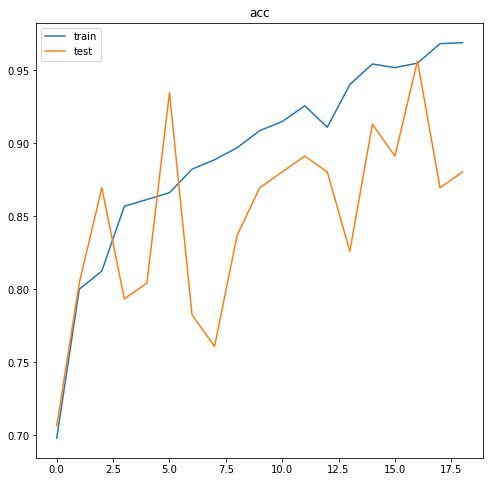




















 63%|███████████████████████████████████████████████████▉                              | 19/30 [03:31<01:54, 10.37s/it]

epoch 19, train loss 0.08, test loss 0.24, train acc 0.98, test acc 0.91


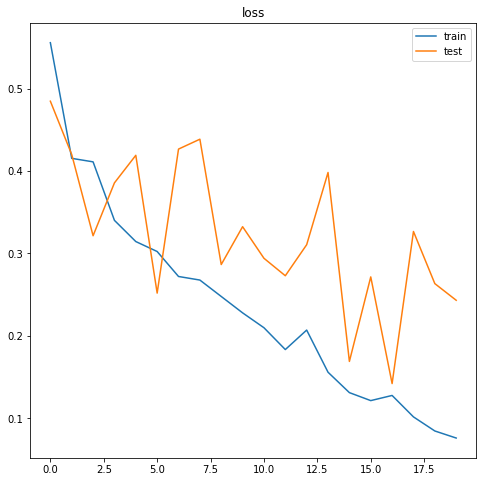

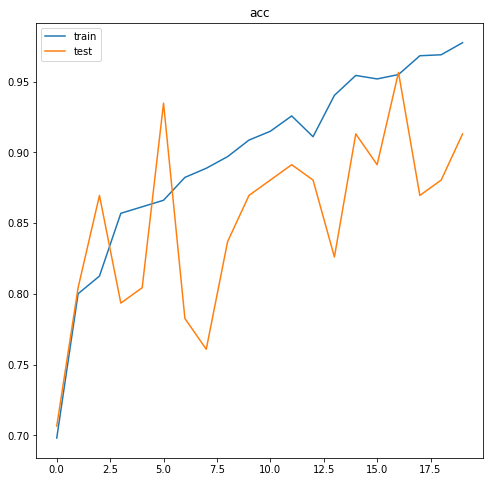




















 67%|██████████████████████████████████████████████████████▋                           | 20/30 [03:41<01:42, 10.27s/it]

epoch 20, train loss 0.07, test loss 0.36, train acc 0.97, test acc 0.89


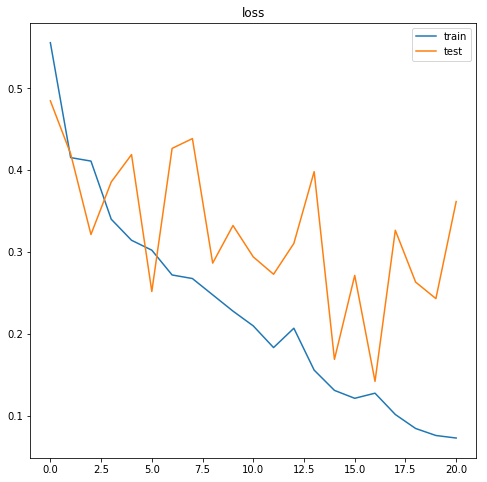

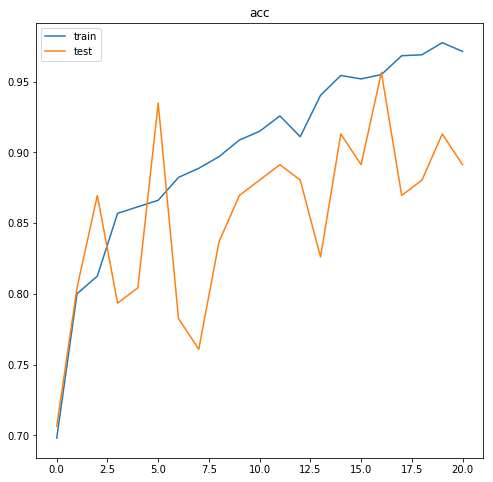




















 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [03:51<01:32, 10.26s/it]

epoch 21, train loss 0.06, test loss 0.15, train acc 0.98, test acc 0.92


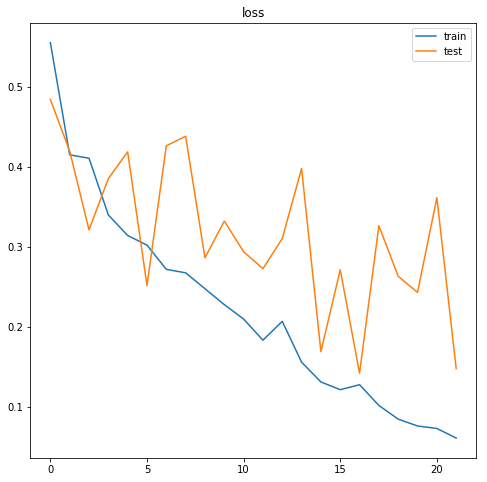

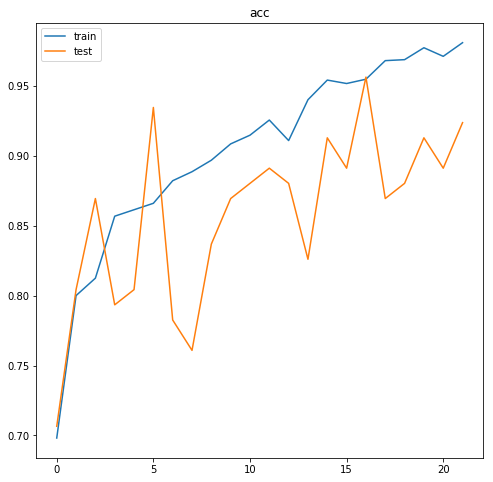




















 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [04:01<01:21, 10.22s/it]

epoch 22, train loss 0.11, test loss 0.32, train acc 0.96, test acc 0.90


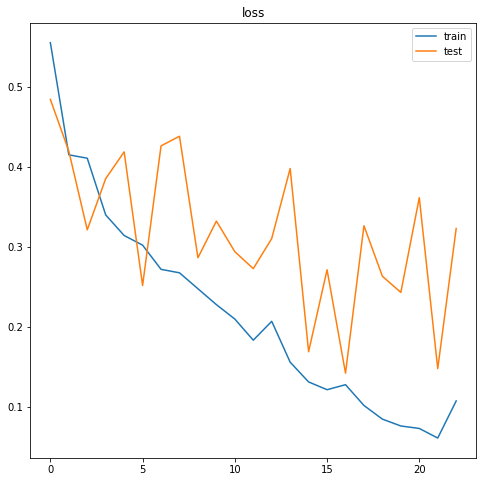

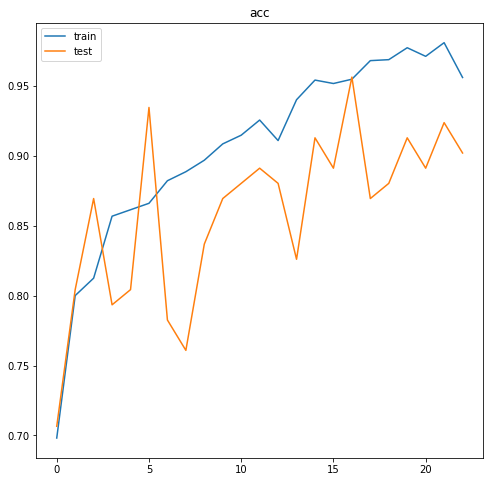




















 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [04:12<01:12, 10.31s/it]

epoch 23, train loss 0.08, test loss 0.29, train acc 0.97, test acc 0.92


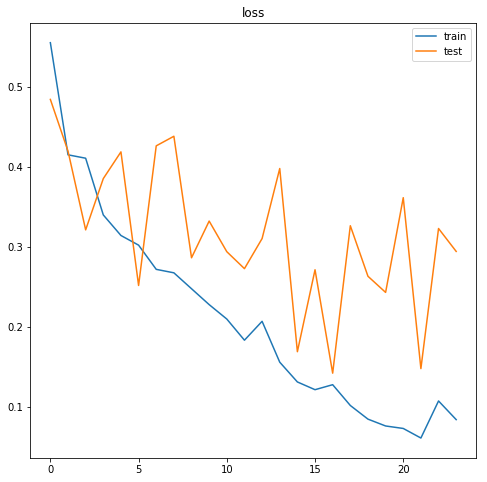

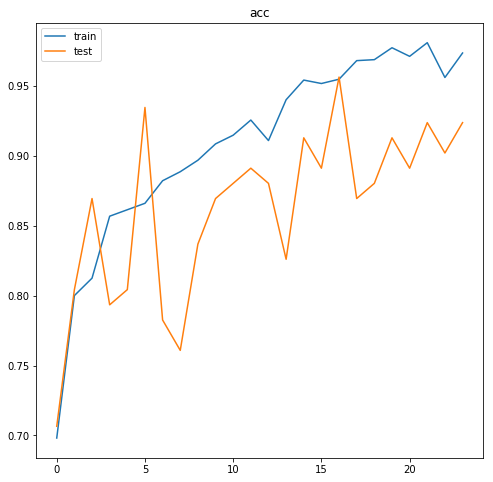




















 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [04:22<01:02, 10.40s/it]

epoch 24, train loss 0.07, test loss 0.26, train acc 0.98, test acc 0.89


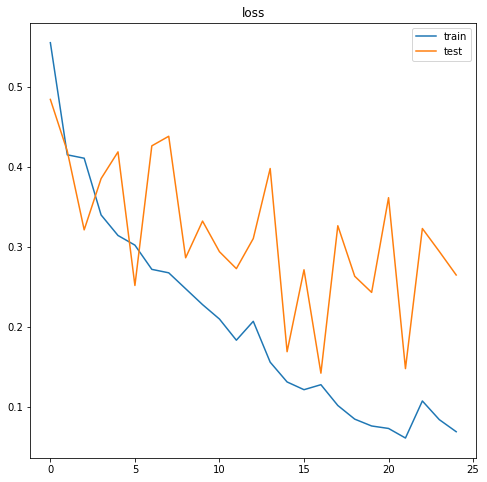

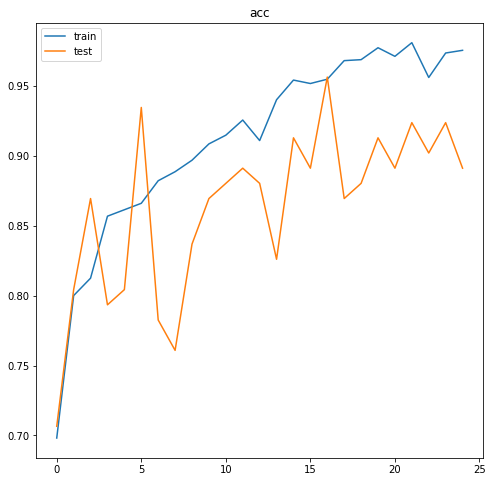




















 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [04:33<00:52, 10.42s/it]

epoch 25, train loss 0.05, test loss 0.20, train acc 0.99, test acc 0.91


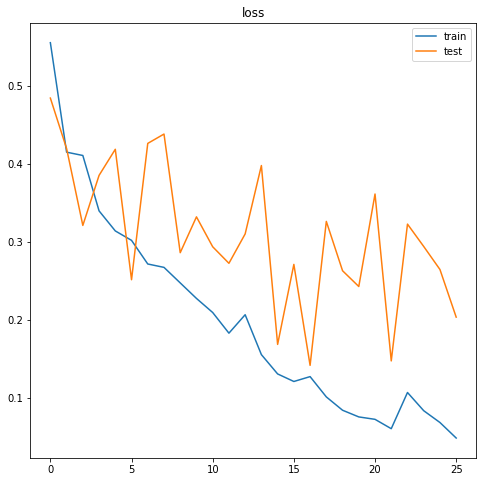

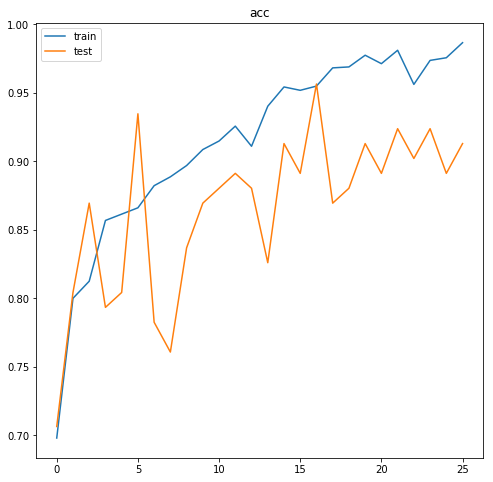




















 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [04:44<00:41, 10.47s/it]

epoch 26, train loss 0.04, test loss 0.19, train acc 0.99, test acc 0.93


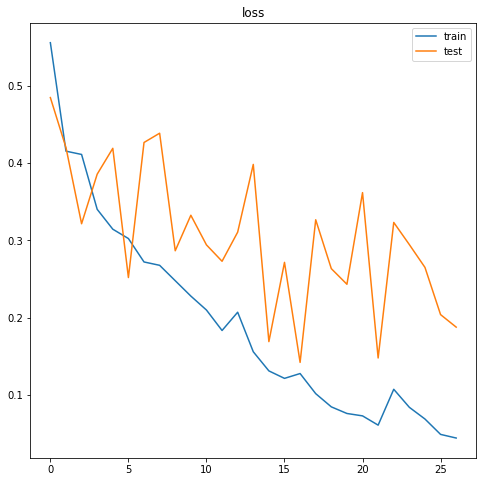

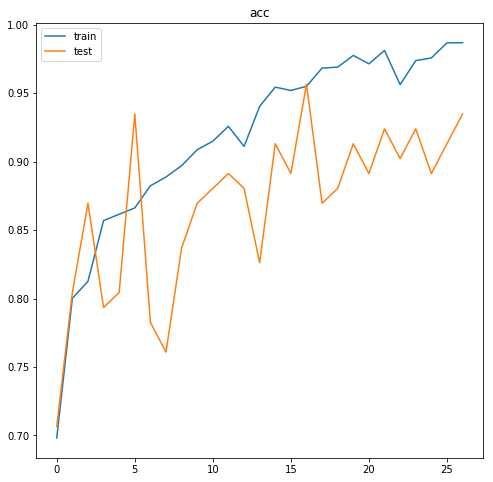




















 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [04:54<00:31, 10.50s/it]

epoch 27, train loss 0.03, test loss 0.43, train acc 0.99, test acc 0.90


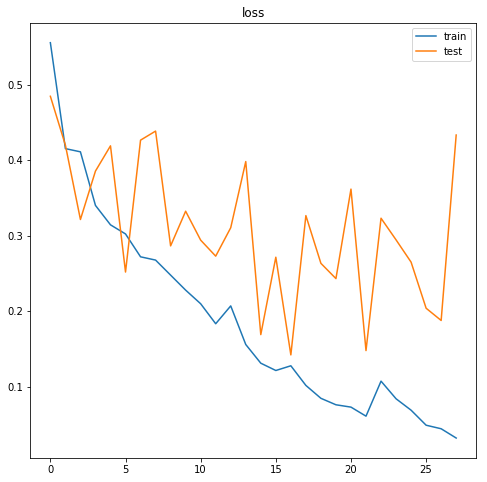

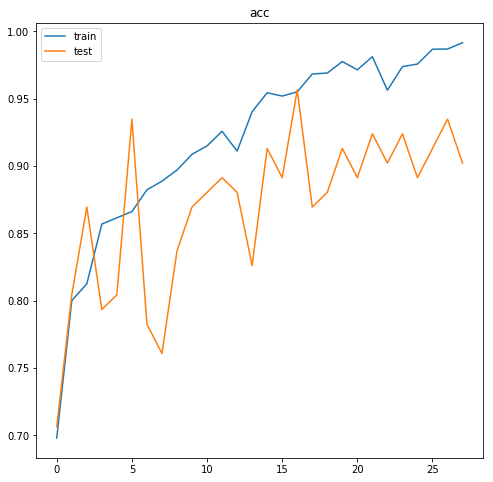




















 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [05:05<00:21, 10.61s/it]

epoch 28, train loss 0.03, test loss 0.19, train acc 0.99, test acc 0.92


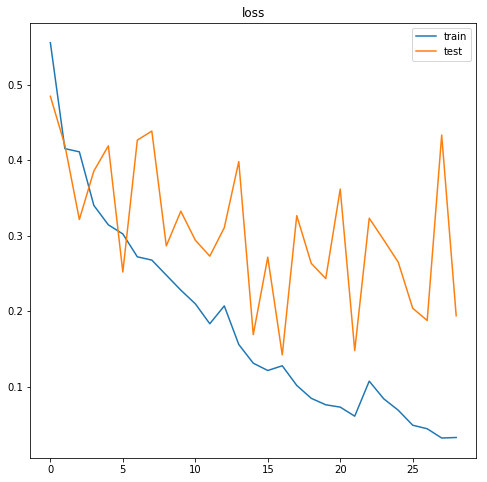

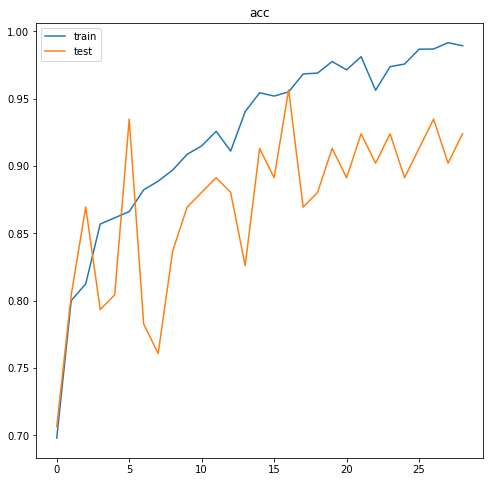




















 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [05:15<00:10, 10.56s/it]

epoch 29, train loss 0.04, test loss 0.12, train acc 0.99, test acc 0.96


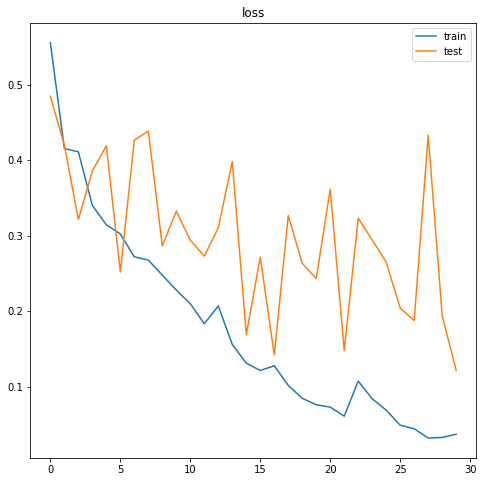

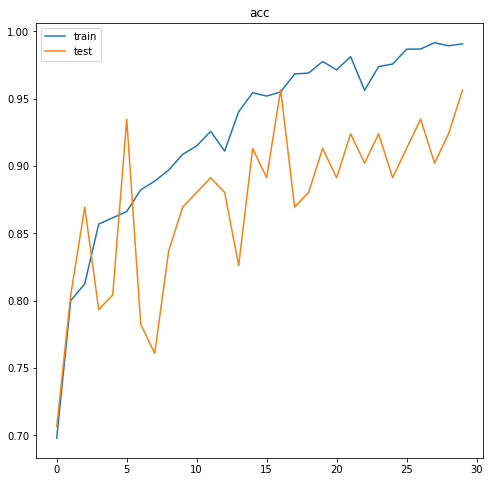




















100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [05:25<00:00, 10.38s/it]

In [115]:
# Реализация модели с тестовым датасетом

model = Model()
opt = torch.optim.Adam(model.parameters(), 1e-3)

stats = {
    'train_loss': [],
    'test_loss': [],
    'train_acc': [],
    'test_acc': []
}
for epoch in tqdm(range(30)):
    train_accs = []
    train_losses = []
    for train_images, train_targets in train_loader:
        train_logits = model(train_images)
        train_loss = F.cross_entropy(input=train_logits, target=train_targets)
        train_acc = accuracy(train_targets, train_logits.argmax(1))         

        opt.zero_grad()
        train_loss.backward()
        opt.step()
        
        train_losses.append(train_loss.data.numpy())
        train_accs.append(train_acc.data.numpy())
        
    for test_images, test_targets in test_loader:
        test_accs = []
        test_losses = []
        test_logits = model(test_images)
        test_loss = F.cross_entropy(input=test_logits, target=test_targets)
        test_acc = accuracy(test_targets, test_logits.argmax(1))
                
        test_losses.append(test_loss.data.numpy())
        test_accs.append(test_acc.data.numpy())        

        
    train_loss = np.mean(train_losses)
    train_acc = np.mean(train_accs)
    test_loss = np.mean(test_losses)
    test_acc = np.mean(test_accs)   
    
    print('epoch {}, train loss {:.2f}, test loss {:.2f}, train acc {:.2f}, test acc {:.2f}'.format(
        epoch, train_loss, test_loss, train_acc, test_acc))
    
    stats['train_loss'].append(train_loss)
    stats['train_acc'].append(train_acc)
    stats['test_loss'].append(test_loss)
    stats['test_acc'].append(test_acc)

    plt.plot(stats['train_loss'], label='train')
    plt.plot(stats['test_loss'], label='test')
    plt.title('loss')
    plt.legend()
    plt.show()

    
    plt.plot(stats['train_acc'], label='train')
    plt.plot(stats['test_acc'], label='test')
    plt.title('acc')
    plt.legend()
    plt.show()
